In [128]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer

##### reading in the scraped data

In [44]:
conspiracy = pd.read_csv('./data/conspiracy_dataset.csv')
qanoncas= pd.read_csv('./data/QAnonCasualties_dataset.csv')

##### checking the shape, and pulling the columns we need for analysis

#### 'conspiracy' subreddit data

In [45]:
conspiracy.shape

(2000, 79)

In [46]:
conspiracy = conspiracy[['title','selftext','subreddit']]

#### 'QanonCasualties' subreddit data

In [47]:
qanoncas.shape

(2000, 82)

In [48]:
qanoncas = qanoncas[['title','selftext','subreddit']]

##### Concatenating both datasets into one

In [90]:
qcas_con = pd.concat([conspiracy,qanoncas])

In [91]:
qcas_con.head()

,title,selftext,subreddit
0,Does tictock listen to you?,I’m not no expert on conspiracy theories but I...,conspiracy
1,Dr Seuss.. Looks like everyone is running with...,Seems some sort of cryptic messaging .. I dont...,conspiracy
2,Why Catholics thrive in the CIA. - Catholic He...,https://saidit.net/s/Jesuits/comments/70a1/why...,conspiracy
3,Sumerian texts speak of ancient kings and a my...,NaN,conspiracy
4,Sumerian texts ppeak of ancient kings and a my...,[deleted],conspiracy


In [92]:
#found some spam during EDA and removing now
qcas_con[qcas_con['title'].str.contains('amazon')].head(25)

,title,selftext,subreddit
326,"free $200 amazon gift card v2-sol only for us,...",[removed],conspiracy
577,"free $200 amazon gift card v2-sol only for us,...",[removed],conspiracy
607,"free $200 amazon gift card v2-sol only for us,...",[removed],conspiracy
609,"free $200 amazon gift card v2-sol only for us,...",[removed],conspiracy
1406,100% Guaranty get free amazon gift card.,[removed],QAnonCasualties
1484,100% Free $200 Amazon gift card Get free amazo...,[removed],QAnonCasualties
1593,Earn Free Amazon Gift Cards &amp; Codes Legall...,[removed],QAnonCasualties
1704,100% Guaranty get free amazon gift card.,[removed],QAnonCasualties


In [93]:
qcas_con.drop([326,577, 607, 609,718, 1406, 1484, 1593,1486,1704,1743,1781], inplace=True)

In [94]:
#Checking my work
qcas_con[qcas_con['title'].str.contains('Gift')]

,title,selftext,subreddit


##### Exporting total dataset to csv

In [95]:
qcas_con.to_csv('./data/total.csv')

In [96]:
qcas_con.reset_index(drop=True, inplace=True)

In [97]:
qcas_con

,title,selftext,subreddit
0,Does tictock listen to you?,I’m not no expert on conspiracy theories but I...,conspiracy
1,Dr Seuss.. Looks like everyone is running with...,Seems some sort of cryptic messaging .. I dont...,conspiracy
2,Why Catholics thrive in the CIA. - Catholic He...,https://saidit.net/s/Jesuits/comments/70a1/why...,conspiracy
3,Sumerian texts speak of ancient kings and a my...,NaN,conspiracy
4,Sumerian texts ppeak of ancient kings and a my...,[deleted],conspiracy
...,...,...,...
3971,Former Q confesses,Perhaps this article posted here already but i...,QAnonCasualties
3972,I’m just exhausted at this point.,I don’t know that my family would consider the...,QAnonCasualties
3973,A bit of Psychology that might be helpful to u...,"""First proposed by Sigmund Freud, this theory ...",QAnonCasualties
3974,I hate it so much but it’s also what it is,TW: abuse / rape / Q\n\nSooooooo\n\nMy dad / s...,QAnonCasualties


#### Converting our target column to binary: is_conspiracy: 1= is from the 'conspiracy' subreddit, 0 = is NOT from the 'conspiracy' subreddit, aka it is the 'QanonCasualties' subreddit.

In [98]:
#DSIR-Lancelot /5.04-lesson-nlp-ii

qcas_con.rename(columns= {'subreddit': 'is_conspiracy'}, inplace=True)


In [99]:
# 0 for QAnonCasualties
# 1 for conspiracy

convert_label = {
    'QAnonCasualties': 0,
    'conspiracy': 1
}
qcas_con['is_conspiracy'] = qcas_con['is_conspiracy'].map(convert_label)

#### Exporting our final dataset

In [100]:
qcas_con.to_csv('./data/total_cleaned.csv')

##### Checking the baseline value (should be .5 because there is even numbers between the 2 datasets)

In [101]:
qcas_con['is_conspiracy'].value_counts(normalize=True)

1    0.5
0    0.5
Name: is_conspiracy, dtype: float64

#### Adding some fields for EDA

In [102]:
#inspired by lab 5.02 : counting the number of chars and words in title field

qcas_con['title_char_length'] = qcas_con['title'].str.len()
qcas_con['title_word_count']= qcas_con['title'].str.split().str.len()

qcas_con.head(10)

,title,selftext,is_conspiracy,title_char_length,title_word_count
0,Does tictock listen to you?,I’m not no expert on conspiracy theories but I...,1,27,5
1,Dr Seuss.. Looks like everyone is running with...,Seems some sort of cryptic messaging .. I dont...,1,62,10
2,Why Catholics thrive in the CIA. - Catholic He...,https://saidit.net/s/Jesuits/comments/70a1/why...,1,75,12
3,Sumerian texts speak of ancient kings and a my...,NaN,1,59,10
4,Sumerian texts ppeak of ancient kings and a my...,[deleted],1,59,10
5,"2021 Is the Year We Get Free Energy, Rife Heal...",NaN,1,118,21
6,Reposted kowaleski13's rant post and just now ...,"They said ""Nerd"" in the ban message. Aw. Such ...",1,87,14
7,....If transhuman programming is anything like...,http://farmwars.info/?p=14817\n\n\nBarbara H. ...,1,60,8
8,Gitmo Military Tribunals Coming to a Global Un...,NaN,1,60,10
9,Has anyone seen the movie Mr. Fantastic ?,[deleted],1,41,8


In [103]:
pd.options.display.max_rows = 999
qcas_con.sort_values(by='title_word_count', ascending=False)

,title,selftext,is_conspiracy,title_char_length,title_word_count
3030,I have a loved one that said the CIA isn't fun...,This person has been falling deeper and deeper...,0,299,60
1108,Where are all the solutions? You can only focu...,I got thinking the other day on how this Great...,1,294,59
1404,Joe Biden is the third president in a row to b...,NaN,1,299,58
1838,Anyone else notice any places selling syringes...,[deleted],1,295,57
2647,Yesterday I wrote about an antivax video forwa...,I'm not going to just make wild accusations of...,0,300,57
...,...,...,...,...,...
3680,???,Not making fun but what is this sub reddit for?,0,3,1
1509,Q,[removed],1,1,1
2893,QFollowers,Hello Fellow Q followers of Reddit my name is ...,0,10,1
1519,Communism,Remember that part from 1984?\n2+2=5\n\nI can’...,1,9,1


In [104]:
qcas_con['title_word_count'].value_counts().idxmax()

6

#### Plotting the distribution of word counts for the titles

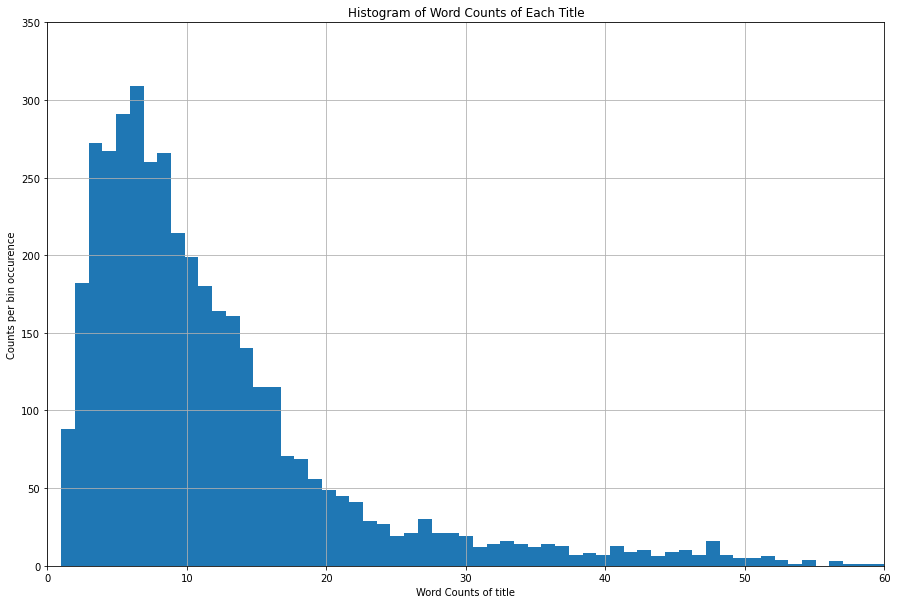

In [105]:
#thanks to Ofili for this code during 5.02 review
plt.figure(figsize=(15,10))
plt.gca().set(ylim =(0,350))
plt.gca().set(xlim =(0,60))
plt.xlabel("Word Counts of title")
plt.ylabel("Counts per bin occurence")
plt.title ("Histogram of Word Counts of Each Title")
qcas_con['title_word_count'].hist(bins=60);

#### This histogram shows that titles range from 1 to 60 words, with most posts at 6 words.

/Users/merylduff/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/merylduff/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


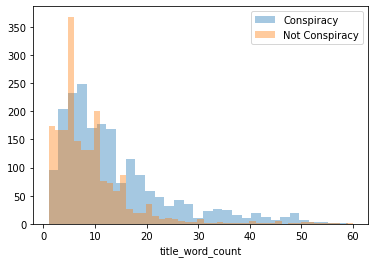

In [106]:
# submissions/labs/5.02-lab-nlp-eda-master review
sns.distplot(qcas_con[qcas_con['is_conspiracy'] == 1]['title_word_count'], kde=False, label='Conspiracy')
sns.distplot(qcas_con[qcas_con['is_conspiracy'] == 0]['title_word_count'], kde=False, label='Not Conspiracy')
plt.legend();

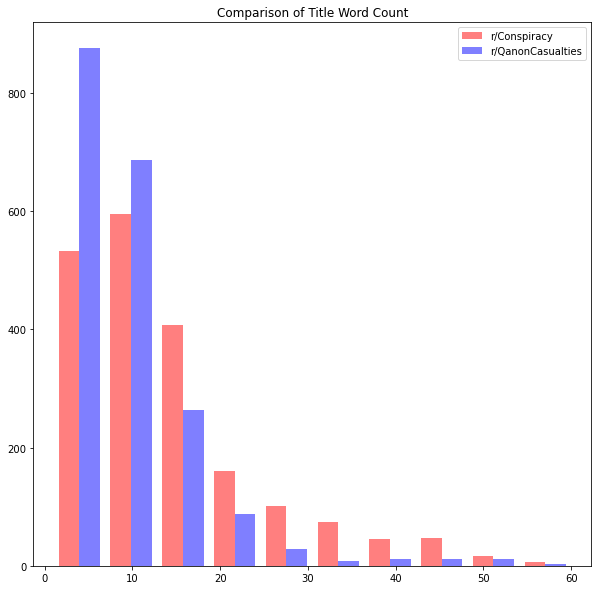

In [141]:
#https://stackoverflow.com/questions/36362624/how-to-plot-multiple-histograms-on-same-plot-with-seaborn
plt.figure(figsize=(10,10))
plt.title(label = 'Comparison of Title Word Count' )
cons = qcas_con[qcas_con['is_conspiracy'] == 1]['title_word_count']
qcasualties = qcas_con[qcas_con['is_conspiracy'] == 0]['title_word_count']
plt.hist([cons, qcasualties], color=['r','b'], alpha=0.5 )
plt.legend(['r/Conspiracy', 'r/QanonCasualties'], loc='upper right');

Here you can see the differences between conspiracy and QanonCasualties posts. The conspiracy subredditors tend to have shorter titles, while the Qanon

In [108]:
qcas_con

,title,selftext,is_conspiracy,title_char_length,title_word_count
0,Does tictock listen to you?,I’m not no expert on conspiracy theories but I...,1,27,5
1,Dr Seuss.. Looks like everyone is running with...,Seems some sort of cryptic messaging .. I dont...,1,62,10
2,Why Catholics thrive in the CIA. - Catholic He...,https://saidit.net/s/Jesuits/comments/70a1/why...,1,75,12
3,Sumerian texts speak of ancient kings and a my...,NaN,1,59,10
4,Sumerian texts ppeak of ancient kings and a my...,[deleted],1,59,10
...,...,...,...,...,...
3971,Former Q confesses,Perhaps this article posted here already but i...,0,18,3
3972,I’m just exhausted at this point.,I don’t know that my family would consider the...,0,33,6
3973,A bit of Psychology that might be helpful to u...,"""First proposed by Sigmund Freud, this theory ...",0,56,10
3974,I hate it so much but it’s also what it is,TW: abuse / rape / Q\n\nSooooooo\n\nMy dad / s...,0,42,11


#### Lets find the most common terms for the total data set as well as each individual one

### Total

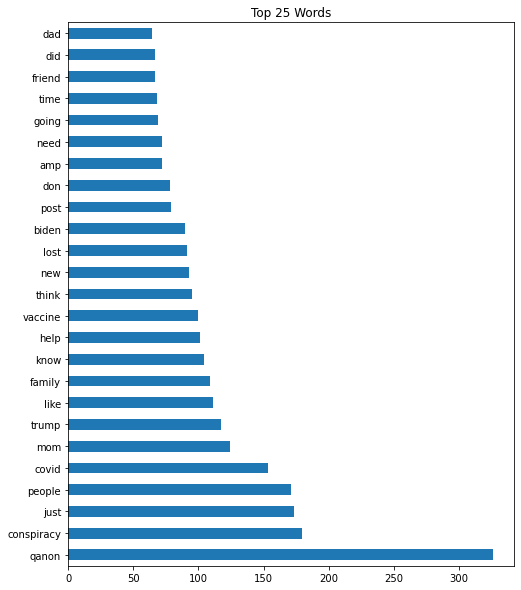

In [109]:
#https://github.com/josephofiowa/zenzic/blob/master/obama-onion/obama-onion-analysis.ipynb

X= qcas_con['title']
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)

# do the above, but make a dataframe with feature names = words
tf1 = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())

# see most common terms
top_25 = tf1.sum().sort_values(ascending=False).head(25)
top_25.plot(kind='barh', figsize=(8,10), title = 'Top 25 Words');

### r/Conspiracy

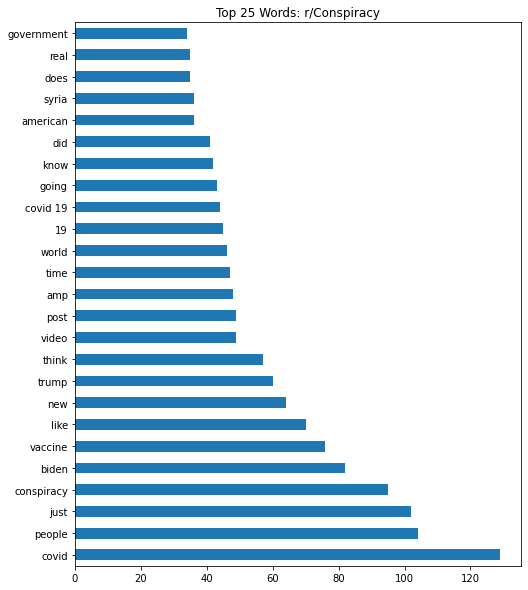

In [110]:
#https://github.com/josephofiowa/zenzic/blob/master/obama-onion/obama-onion-analysis.ipynb

X= conspiracy['title']
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)

# do the above, but make a dataframe with feature names = words
tf2 = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())

# see most common terms
top_25_conspiracy = tf2.sum().sort_values(ascending=False).head(25)
top_25_conspiracy.plot(kind='barh', figsize=(8,10), title = 'Top 25 Words: r/Conspiracy');

### r/QanonCasualties

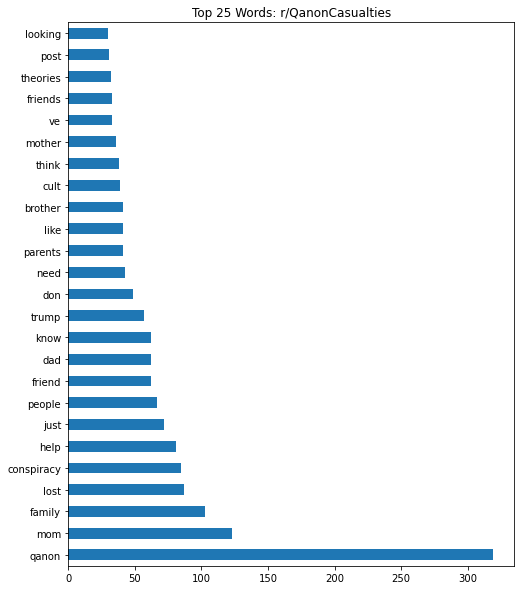

In [111]:
#https://github.com/josephofiowa/zenzic/blob/master/obama-onion/obama-onion-analysis.ipynb

X= qanoncas['title']
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)


#make a dataframe with feature names = words
tf3 = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())

# see most common terms
top_25_qanoncasualties = tf3.sum().sort_values(ascending=False).head(25)
top_25_qanoncasualties.plot(kind='barh', figsize = (8,10),title = 'Top 25 Words: r/QanonCasualties');

### Sentiment on titles
with help from #DSIR-Lancelot/5.03-lesson-nlp

In [112]:
sia = SentimentIntensityAnalyzer()


In [131]:
# Getting Sentiment scores for the Titles
scores= []
for each in qcas_con['title']:
    current_scores = sia.polarity_scores(each)
    scores.append(current_scores)

# Adding them to dataframe
scores_df = pd.DataFrame(scores)
df = pd.concat([qcas_con, scores_df], axis=1)

# 15 most positive titles
df.sort_values(by='compound').head(15)

,title,selftext,is_conspiracy,title_char_length,title_word_count,neg,neu,pos,compound
3931,I’m hoping Q is labeled as a national threat a...,Conspiracy theorists and cults pose a national...,0,255,42,0.450,0.503,0.047,-0.9750
1449,Remember all of the outrage when Trump killed ...,NaN,1,158,25,0.526,0.431,0.043,-0.9689
153,Fact Checkers and the Government on the same s...,NaN,1,267,47,0.342,0.628,0.030,-0.9576
451,Silent weapons for quiet wars is a must read. ...,NaN,1,247,48,0.307,0.693,0.000,-0.9493
1398,We’re Telling Kids the Planet Is Doomed and Yo...,[deleted],1,201,34,0.402,0.533,0.066,-0.9468
3082,My mom suddenly believes Trump is still Presid...,My mom was formerly liberal leaning.\n\nShe th...,0,235,45,0.266,0.734,0.000,-0.9340
1013,"The voices of the illuminati brainwashing, are...",NaN,1,240,35,0.358,0.602,0.040,-0.9300
158,Killing someone is not against the law in war ...,**I do not condone any sort of violence under ...,1,107,20,0.437,0.563,0.000,-0.9246
1884,Heaviest conspiracy I've seen i think. Tldr: b...,[deleted],1,76,13,0.600,0.400,0.000,-0.9186
890,"1,282 measles infections and zero deaths in 20...",[.](https://img.theweek.in/content/dam/week/ne...,1,200,33,0.328,0.672,0.000,-0.9134


In [133]:
df[df['is_conspiracy']==1].mean()

is_conspiracy         1.000000
title_char_length    82.247988
title_word_count     13.920523
neg                   0.113493
neu                   0.811749
pos                   0.073255
compound             -0.065946
dtype: float64

In [134]:
df[df['is_conspiracy']==0].mean()

is_conspiracy         0.000000
title_char_length    50.714789
title_word_count      9.206237
neg                   0.126320
neu                   0.778552
pos                   0.094624
compound             -0.030851
dtype: float64

In [115]:
# Most positive sentiment
df.loc[3931, 'title']

'I’m hoping Q is labeled as a national threat and domestic terrorist by the FBI or a dangerous cult and members of Congress involved are arrested and charged with domestic terrorism. The FBI probably is tracking these criminals for subsequent future arrest'

In [116]:
# 15 least positive titles
df.sort_values(by='compound', ascending=False).head(15)

,title,selftext,is_conspiracy,title_char_length,title_word_count,neg,neu,pos,compound
2935,"Dad has gotten better, but my respect for him ...","Don't get me wrong, he's still consuming a lot...",0,191,40,0.032,0.670,0.298,0.9336
3030,I have a loved one that said the CIA isn't fun...,This person has been falling deeper and deeper...,0,299,60,0.000,0.802,0.198,0.9332
2102,The actual best way to help ya Qanon loved one...,[deleted],0,63,13,0.000,0.396,0.604,0.9287
360,PLease watch all episodes of this amazing unde...,NaN,1,234,37,0.075,0.612,0.313,0.9191
188,I Love The Passion!! He isnt wrong! He works f...,NaN,1,231,46,0.115,0.590,0.295,0.8941
2378,This is what my pilled BFF is sharing with my ...,After this was shared with me by a friend (I’v...,0,71,14,0.000,0.511,0.489,0.8893
2625,You can't fight hate with hate. It just makes ...,The title is self explanatory and most on here...,0,56,11,0.000,0.385,0.615,0.8801
917,Next time you meet someone who feels the need ...,NaN,1,251,47,0.000,0.777,0.223,0.8761
3424,Encouraging people to eNgAgE mEaNiNgFuLLy and ...,Never believe that anti-Semites are completely...,0,82,12,0.000,0.474,0.526,0.8750
2053,Suspect my adult Brother is into Q. He’s isola...,[deleted],0,142,24,0.097,0.568,0.335,0.8734


In [117]:
df.loc[2935, 'title']

'Dad has gotten better, but my respect for him is gone. I find it hard to trust any fact he gives out in conversation, even if it has been completely true and known. How do I get over it this?'